In [1]:
import os
import os.path as op
import numpy as np

import getpass
import subprocess

from astropy.table import Table
from astropy.coordinates import SkyCoord

## Data Model Overview

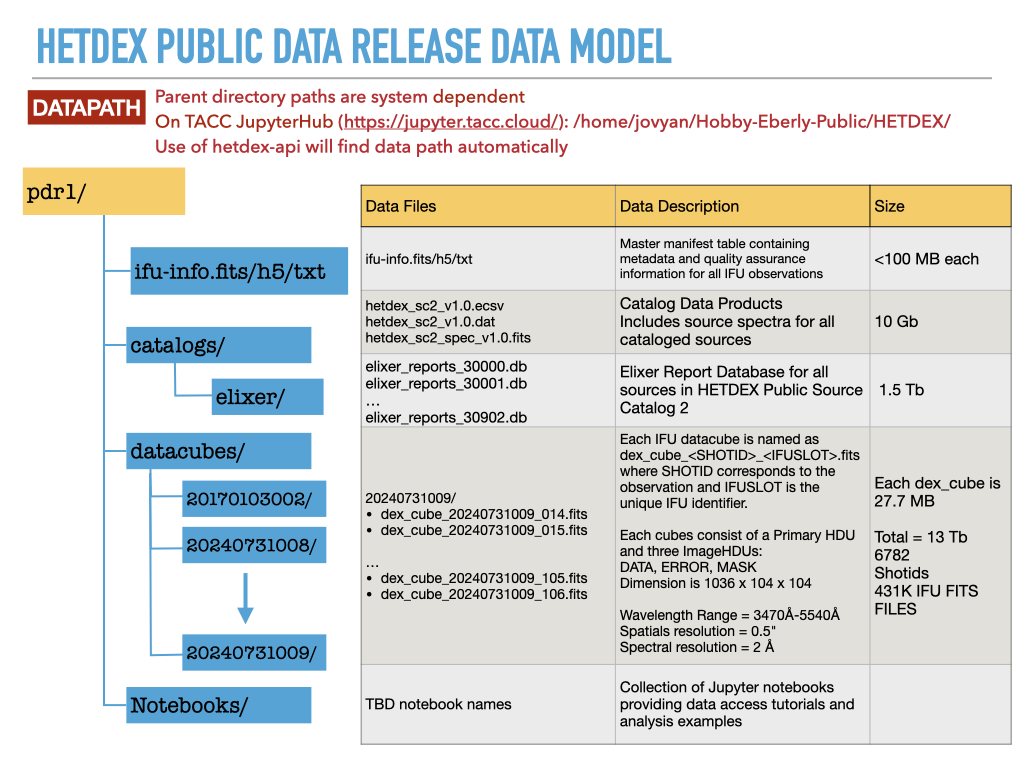

In [2]:
from IPython.display import Image, display

# Replace with your PNG file path
display(Image(filename="PDR1 Data Model.png"))

## If Operating Remotely Download the ifu-index.fits file

In [4]:
# Check if this is running within the HETDEX JupyterHub
pdr1_dir = '/home/jovyan/Hobby-Eberly-Public/HETDEX/internal/pdr1/'
if op.exists( pdr1_dir):
    flag_remote = False
else:
    flag_remote = True

In [5]:
if flag_remote:

    # Set username and URL for the file
    username = 'hetdex_internal'
    url = 'http://web.corral.tacc.utexas.edu/hetdex/HETDEX/internal/pdr1/ifu-index.fits'
    output_dir = 'pdr1'
    
    # Ensure that the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Determine the output file's path (uses the basename from URL)
    output_file = os.path.join(output_dir, os.path.basename(url))
    
    # Check if the file already exists
    if os.path.exists(output_file):
        choice = input(f"The file '{output_file}' already exists. Do you want to overwrite it? (y/N): ").strip().lower()
        if choice != 'y':
            print("File exists and overwrite was not chosen. Exiting without downloading.")
        else:
            print("Overwriting the existing file.")
    else:
        print("File does not exist. Proceeding with download.")
    
    # Proceed with download only if file doesn't exist or user confirmed overwrite
    if not os.path.exists(output_file) or choice == 'y':
        # Prompt securely for the password without echoing
        password = getpass.getpass('Password: ')
        
        # Construct the wget command with the user, password, output directory, and URL
        cmd = [
            'wget',
            #'--quiet',
            '--user', username,
            '--password', password,
            '-O', output_file,  # <- explicitly write to this path
            url
        ]
        
        # Run the command
        subprocess.run(cmd)

    pdr1_dir = 'pdr1/'
    print('Done downloading index file to', output_file)
else:
    pdr1_dir = '/home/jovyan/Hobby-Eberly-Public/HETDEX/internal/pdr1/'

## IFU Info

In [6]:
ifu_data = Table.read(op.join( pdr1_dir, 'ifu-index.fits'))

| Column Name     | Description                                               | Data Type   | Units   |
|----------------|-----------------------------------------------------------|-------------|---------|
| shotid          | Shot ID integer representing a shot: DATEOBS              | int64       | —       |
| ifuslot         | IFU slot number (e.g., 046, 063, etc.)                    | str         | —       |
| ra_cen          | Right Ascension of IFU center (ICRS)                      | float32     | deg     |
| dec_cen         | Declination of IFU center (ICRS)                          | float32     | deg     |
| flag            | Fraction of the IFU flagged overall                       | float32     | —       |
| flag_badamp     | Fraction of IFU flagged for bad amplifier(s)              | float32     | —       |
| flag_badfib     | Fraction of IFU flagged for bad fiber(s)                  | float32     | —       |
| flag_meteor     | Fraction of IFU flagged for meteor trail contamination    | float32     | —       |
| flag_satellite  | Fraction of IFU flagged for satellite trail contamination | float32     | —       |
| flag_shot       | Fraction of IFU flagged at the shot level                 | float32     | —       |
| flag_throughput | Fraction of IFU flagged for low throughput                | float32     | —       |
| field           | Field identifier (e.g., 'dex-spring')                     | str         | —       |
| objid           | Object ID (string identifier)                             | str         | —       |
| date            | Date of the observation                                   | int32       | —       |
| obsid           | Observation index                                         | int32       | —       |
| ra_shot         | RA of shot center                                         | float64     | deg     |
| dec_shot        | Dec of shot center                                        | float64     | deg     |
| pa              | Parallactic angle                                         | float64     | deg     |
| n_ifu           | Number of active IFUs in the shot                         | int32       | —       |
| fwhm_virus      | Seeing (FWHM) from VIRUS                                  | float32     | arcsec  |
| fwhm_virus_err  | Error in seeing measurement                               | float32     | arcsec  |
| response_4540   | Normalized system throughput at 4540 Å                    | float32     | —       |
| ambtemp         | Ambient temperature                                       | float32     | °C      |
| datevobs        | Observation date string                                   | str         | —       |
| dewpoint        | Dew point                                                 | float32     | °C      |
| exptime         | Exposure time                                             | float32     | s       |
| humidity        | Relative humidity                                         | float32     | %       |
| mjd             | Modified Julian Date                                      | float32     | d       |
| nstars_fit_fwhm | Number of stars used for seeing estimate                  | int32       | —       |
| obsind          | Observation index (unused)                                | int32       | —       |
| pressure        | Barometric pressure                                       | float32     | Torr    |
| structaz        | Telescope azimuth                                         | float32     | deg     |
| time            | Start time of exposure                                    | str         | UTC     |
| trajcdec        | TRAJDEC from telescope header                             | float32     | deg     |
| trajcpa         | TRAJPA (parallactic angle)                                | float32     | deg     |
| trajcra         | TRAJRA from telescope header                              | float32     | deg     |
